In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('bank-full.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
y = np.array(df['y'])
X = df.drop(['y'],axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

In [ ]:
train = X_train.copy()
train['y'] = y_train

val = X_val.copy()
val['y'] = y_val

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,no
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown,no
27484,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 13382 to 3184
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  y          31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


In [ ]:
mapping = {'no': 0, 'yes': 1}
train['y'] = train['y'].map(mapping)

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,0
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,0
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,0
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown,0
27484,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,0


In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.883022,1363.589535,15.806712,258.755143,2.760040,39.869498,0.584795,0.116978
std,10.621809,3070.235315,8.331080,259.880162,3.104999,99.674113,2.490925,0.321399
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,451.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1427.500000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [ ]:
categorical_columns = []

for column in train.columns:
    if train[column].dtype == 'object':
        categorical_columns.append(column)
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
num = []
for column in categorical_columns:
  num.append(train[column].value_counts())
print(num)

[blue-collar      6866
management       6530
technician       5306
admin.           3662
services         2879
retired          1590
self-employed    1076
entrepreneur     1044
unemployed        918
housemaid         893
student           677
unknown           206
Name: job, dtype: int64, married     19049
single       8966
divorced     3632
Name: marital, dtype: int64, secondary    16201
tertiary      9247
primary       4885
unknown       1314
Name: education, dtype: int64, no     31083
yes      564
Name: default, dtype: int64, yes    17625
no     14022
Name: housing, dtype: int64, no     26573
yes     5074
Name: loan, dtype: int64, cellular     20517
unknown       9100
telephone     2030
Name: contact, dtype: int64, may    9643
jul    4846
aug    4355
jun    3725
nov    2771
apr    2081
feb    1829
jan     986
oct     528
sep     386
mar     337
dec     160
Name: month, dtype: int64, unknown    25917
failure     3378
other       1301
success     1051
Name: poutcome, dtype: int64]


Encoding

In [ ]:
train['education'] = train['education'].map({'tertiary': 3, 'secondary': 2, 'unknown': 0, 'primary': 1})
train['default'] = train['default'].map({'no': 0, 'yes': 1})
train['housing'] = train['housing'].map({'yes': 1, 'no': 0})
train['loan'] = train['loan'].map({'no': 0, 'yes': 1})
train['contact'] = train['contact'].map({'unknown': 0, 'cellular': 1, 'telephone': 2})
train['month'] = train['month'].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2,
                                     'mar': 3, 'apr': 4, 'sep': 9})
train['poutcome'] = train['poutcome'].map({'unknown': 0, 'failure': 0, 'other': 1, 'success': 2})


In [ ]:
train = pd.get_dummies(train, columns=['job', 'marital'])

In [ ]:
train.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
13382,31,2,0,1,1,0,1,9,7,82,...,0,0,1,0,0,0,0,0,1,0
32641,35,2,0,195,1,0,1,17,4,203,...,0,0,1,0,0,0,0,0,1,0
3991,24,2,0,77,1,0,0,16,5,236,...,0,0,0,0,0,0,0,0,0,1
8068,35,2,0,80,1,1,0,2,6,579,...,0,0,0,0,0,0,0,0,1,0
27484,37,2,0,105,0,1,1,21,11,197,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
train['month_sin'] = np.sin(2 * np.pi * train['month']/12.0)
train['month_cos'] = np.cos(2 * np.pi * train['month']/12.0)

train['month_c'] = np.arctan2(train['month_sin'], train['month_cos'])

train['month_c'] = np.degrees(train['month_c'])
train['month_c'] = train['month_c'].apply(lambda x: x + 360 if x < 0 else x)

train['day_sin'] = np.sin(2 * np.pi * train['day']/7.0)
train['day_cos'] = np.cos(2 * np.pi * train['day']/7.0)

train['day_c'] = np.arctan2(train['day_sin'], train['day_cos'])

train['day_c'] = np.degrees(train['day_c'])
train['day_c'] = train['day_c'].apply(lambda x: x + 360 if x < 0 else x)

train = train.drop(['month_sin', 'month_cos', 'day_sin', 'day_cos', 'day', 'month'], axis=1)

In [ ]:
def encoding(df):
  df['education'] = df['education'].map({'tertiary': 3, 'secondary': 2, 'unknown': 0, 'primary': 1})
  df['default'] = df['default'].map({'no': 0, 'yes': 1})
  df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
  df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
  df['contact'] = df['contact'].map({'unknown': 0, 'cellular': 1, 'telephone': 2})
  df['month'] = df['month'].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2,
                                      'mar': 3, 'apr': 4, 'sep': 9})
  df['poutcome'] = df['poutcome'].map({'unknown': 0, 'failure': 0, 'other': 1, 'success': 2})

  df = pd.get_dummies(df, columns=['job', 'marital'])

  df['month_sin'] = np.sin(2 * np.pi * df['month']/12.0)
  df['month_cos'] = np.cos(2 * np.pi * df['month']/12.0)

  df['month_c'] = np.arctan2(df['month_sin'], df['month_cos'])

  df['month_c'] = np.degrees(df['month_c'])
  df['month_c'] = df['month_c'].apply(lambda x: x + 360 if x < 0 else x)

  df['day_sin'] = np.sin(2 * np.pi * df['day']/7.0)
  df['day_cos'] = np.cos(2 * np.pi * df['day']/7.0)

  df['day_c'] = np.arctan2(df['day_sin'], df['day_cos'])

  df['day_c'] = np.degrees(df['day_c'])
  df['day_c'] = df['day_c'].apply(lambda x: x + 360 if x < 0 else x)

  df = df.drop(['month_sin', 'month_cos', 'day_sin', 'day_cos', 'day', 'month'], axis=1)
  return df

In [ ]:
train.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,month_c,day_c
13382,31,2,0,1,1,0,1,82,1,-1,...,1,0,0,0,0,0,1,0,210.0,102.857143
32641,35,2,0,195,1,0,1,203,1,-1,...,1,0,0,0,0,0,1,0,120.0,154.285714
3991,24,2,0,77,1,0,0,236,2,-1,...,0,0,0,0,0,0,0,1,150.0,102.857143
8068,35,2,0,80,1,1,0,579,2,-1,...,0,0,0,0,0,0,1,0,180.0,102.857143
27484,37,2,0,105,0,1,1,197,2,157,...,1,0,0,0,0,0,0,1,330.0,360.000000


Outliery

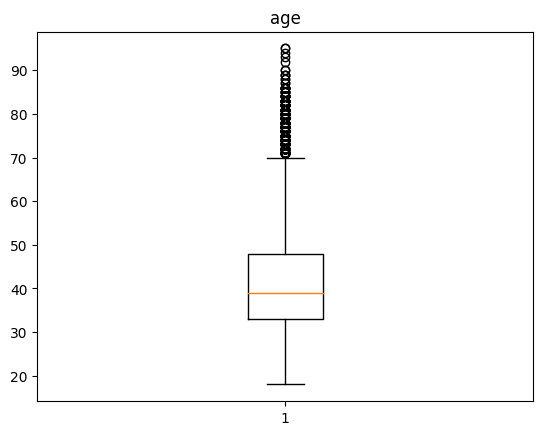

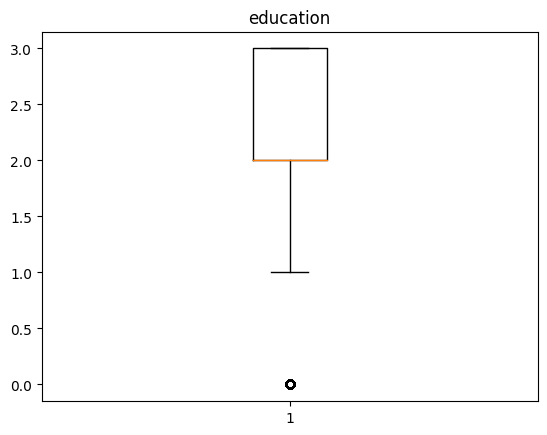

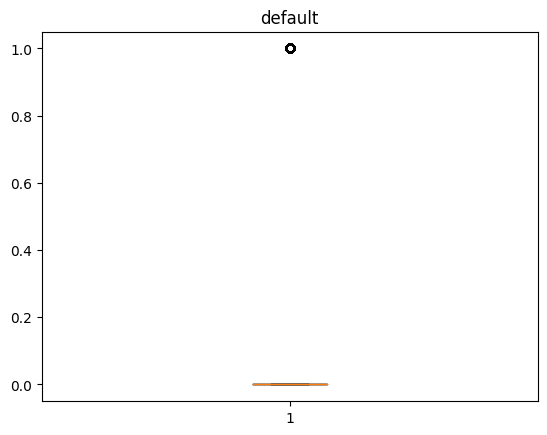

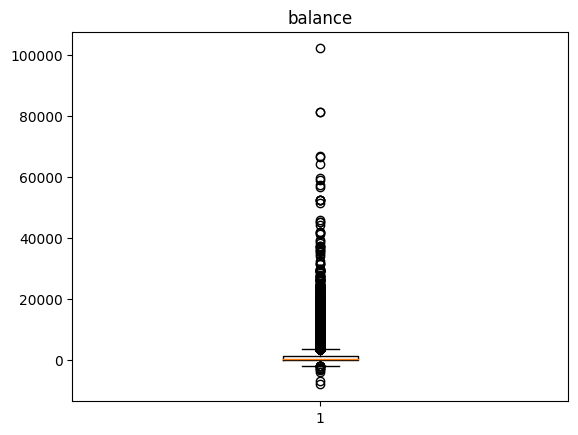

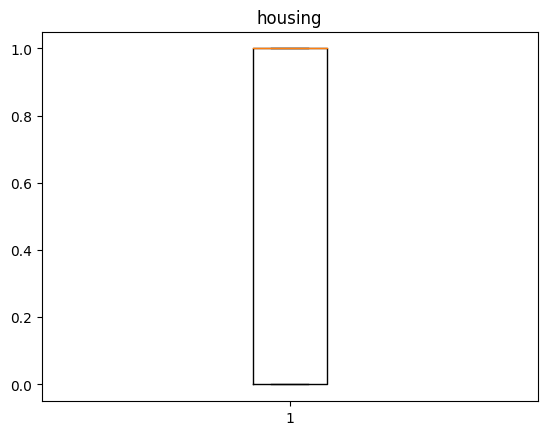

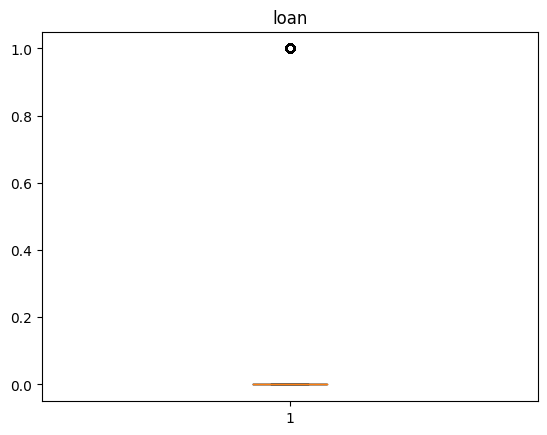

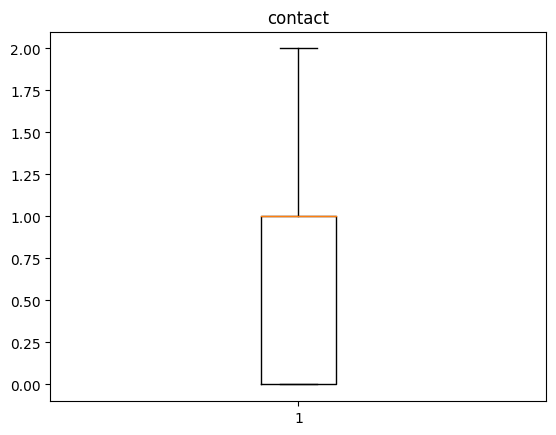

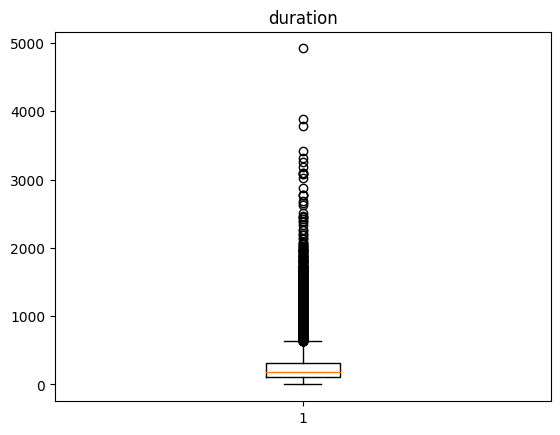

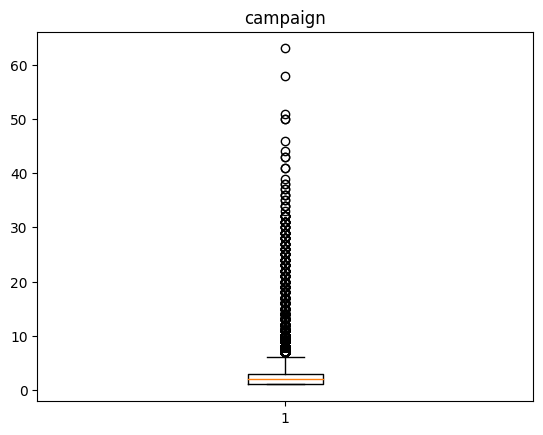

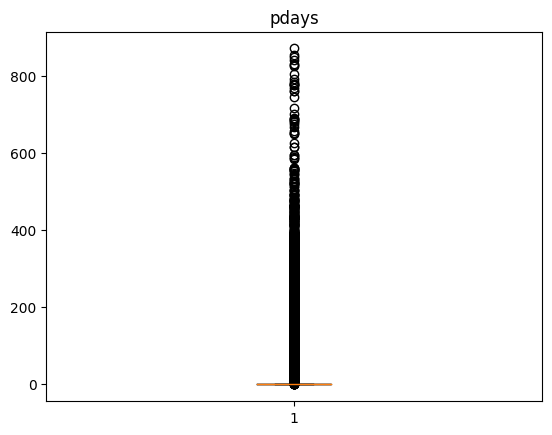

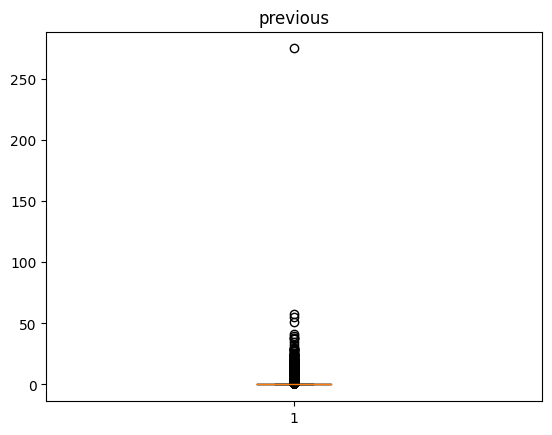

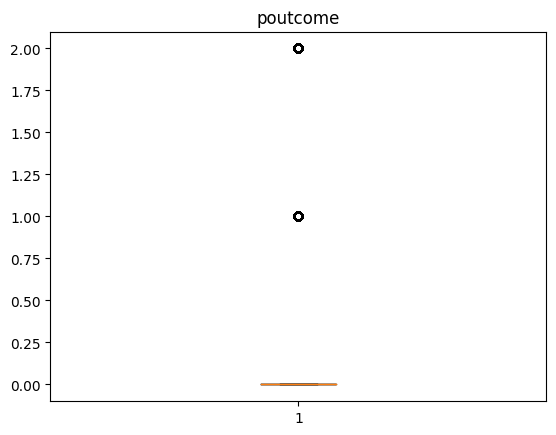

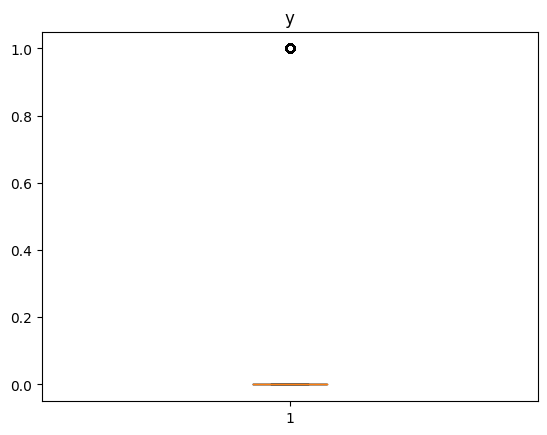

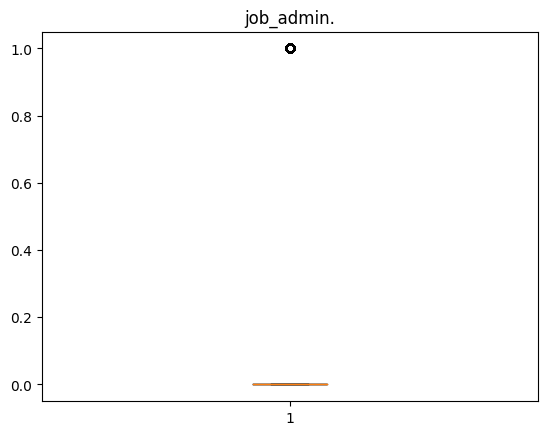

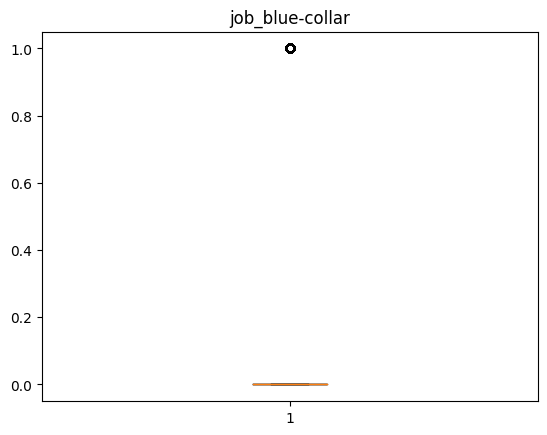

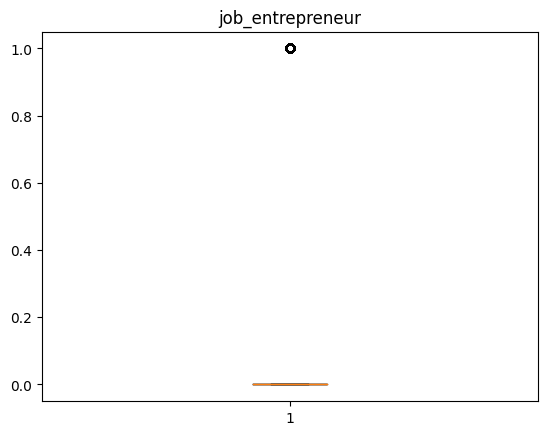

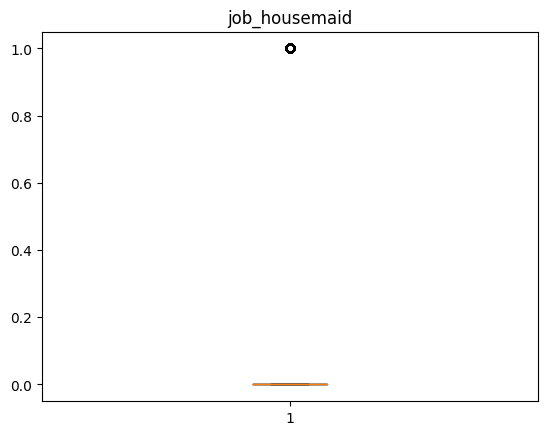

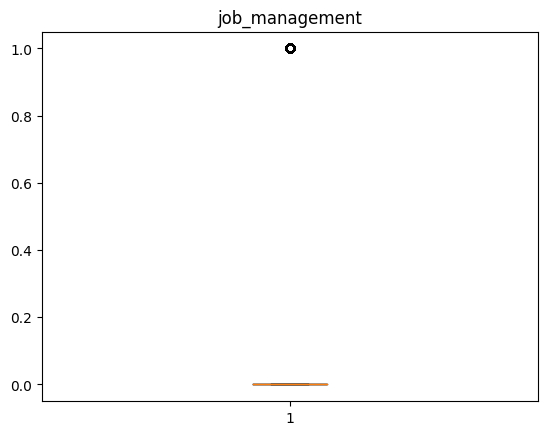

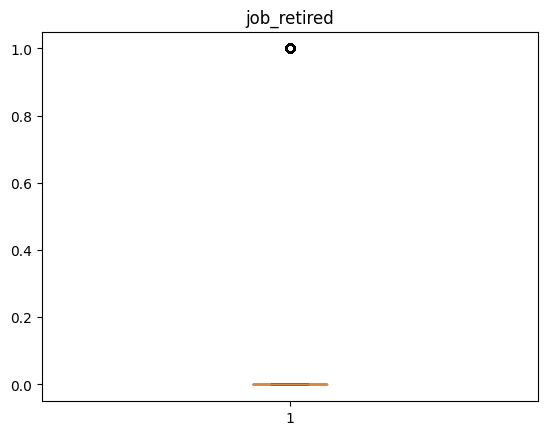

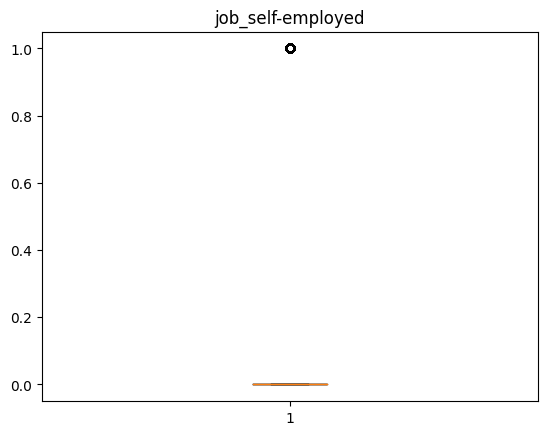

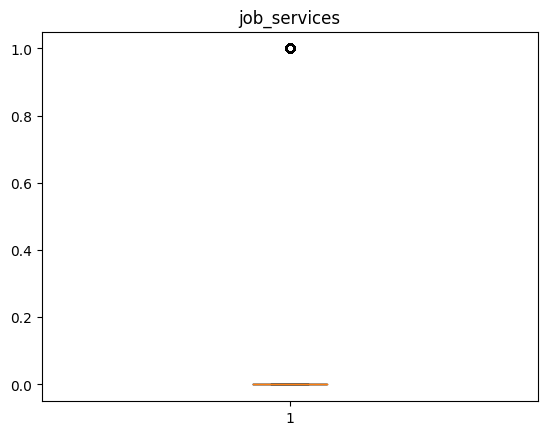

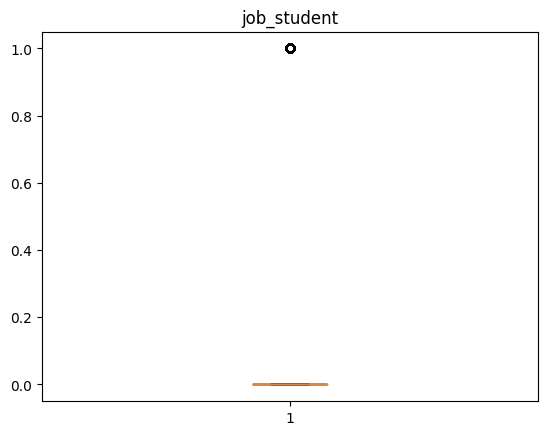

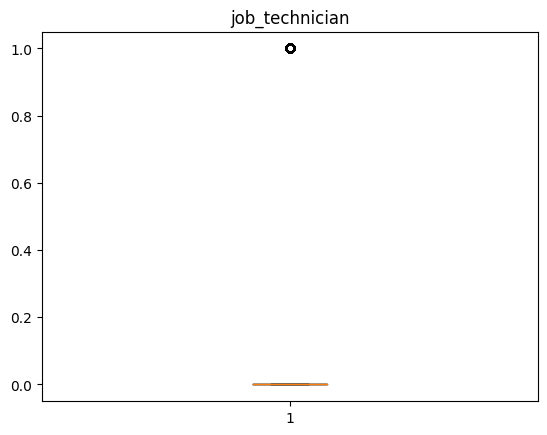

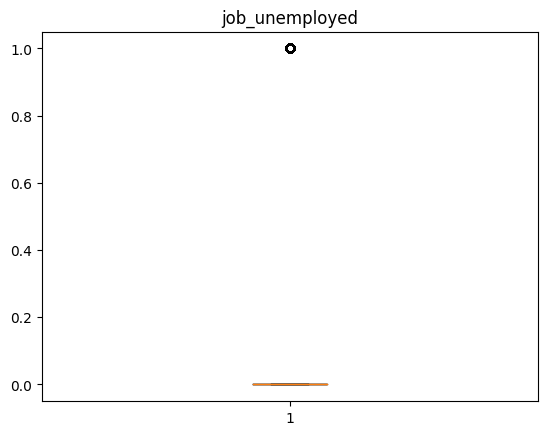

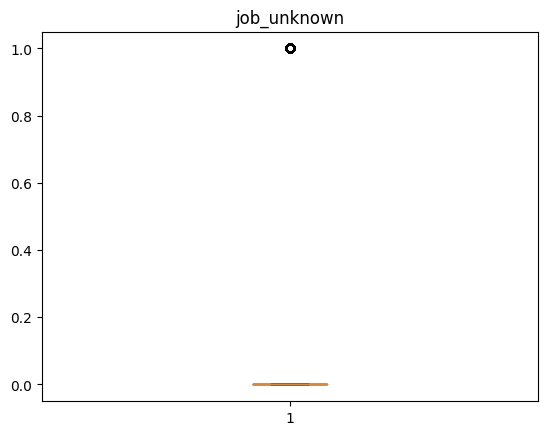

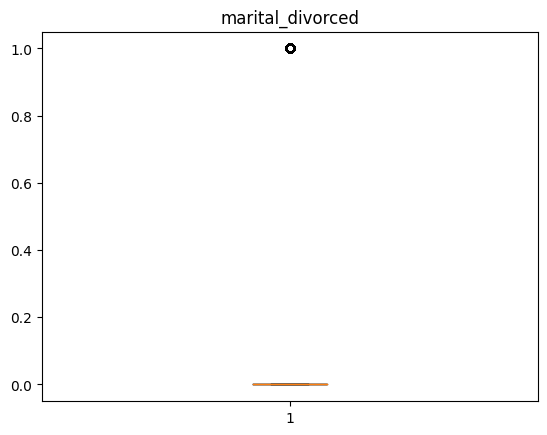

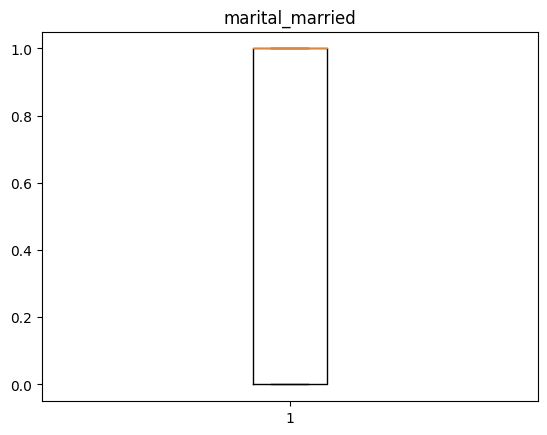

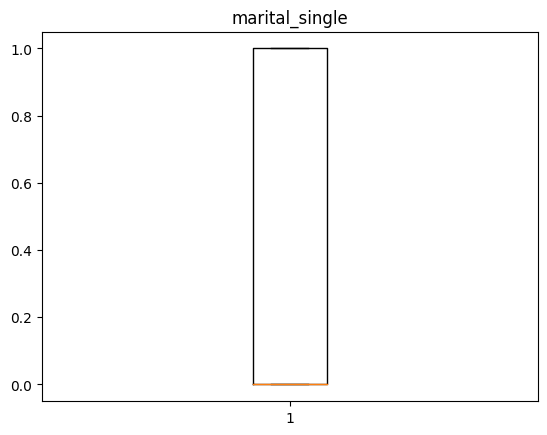

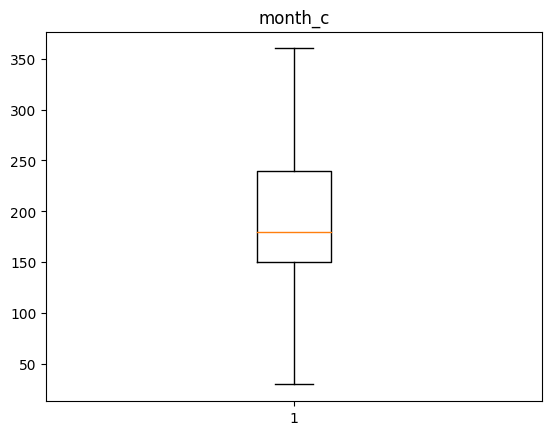

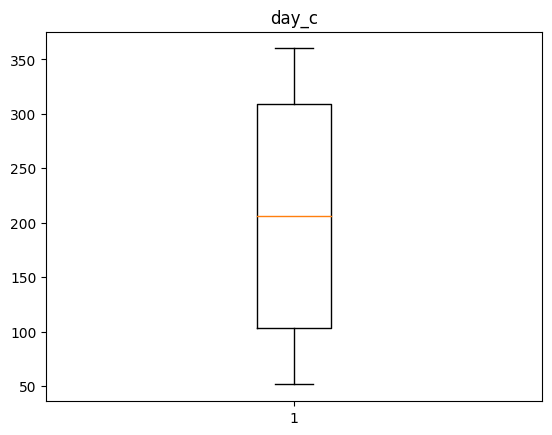

In [ ]:
import matplotlib.pyplot as plt

for col in train.columns:
    fig, ax = plt.subplots()
    ax.boxplot(train[col])
    ax.set_title(col)
    plt.show()

In [ ]:
cols_with_outliers = ['pdays', 'balance', 'campaign', 'previous', 'duration']

In [ ]:
from scipy.stats import mstats

def winsorize_columns(data, lower_limit=0, upper_limit=0.05):
    columns = ['pdays', 'balance', 'campaign', 'previous', 'duration']
    winsorized_data = data.copy()

    for col in columns:
        winsorized_data[col] = mstats.winsorize(winsorized_data[col], limits=[lower_limit, upper_limit])

    return winsorized_data


In [ ]:
pdayss = train['pdays'].value_counts()
print(pdayss)
previous = train['previous'].value_counts()
print(previous)

-1      25912
 182      114
 92        97
 91        89
 181       79
        ...  
 425        1
 805        1
 455        1
 445        1
 382        1
Name: pdays, Length: 516, dtype: int64
0      25912
1       1944
2       1449
3        782
4        485
5        318
6        196
7        137
8         96
9         64
10        49
11        43
12        33
13        29
14        14
15        13
17        12
16        11
19         8
18         6
20         5
23         5
22         4
21         4
29         3
25         3
24         3
38         2
27         2
26         2
30         2
28         2
55         1
275        1
58         1
32         1
37         1
51         1
35         1
40         1
41         1
Name: previous, dtype: int64


In [ ]:
train = winsorize_columns(train)

In [ ]:
loans = train['loan'].value_counts()
print(loans)
pdayss = train['pdays'].value_counts()
print(pdayss)
previous = train['previous'].value_counts()
print(previous)

0    26573
1     5074
Name: loan, dtype: int64
-1      25912
 316     1587
 182      114
 92        97
 91        89
        ...  
 54         1
 45         1
 51         1
 218        1
 3          1
Name: pdays, Length: 310, dtype: int64
0    25912
3     2342
1     1944
2     1449
Name: previous, dtype: int64


Korelacje

In [ ]:
corr_matrix = train.corrwith(train['y'])
print(corr_matrix.sort_values(ascending=False))

y                    1.000000
duration             0.404696
poutcome             0.281290
previous             0.159407
contact              0.131192
pdays                0.096751
balance              0.085455
job_student          0.084807
job_retired          0.074266
marital_single       0.067459
education            0.054166
job_management       0.037933
age                  0.019217
job_unemployed       0.018520
month_c              0.018226
job_admin.           0.007262
marital_divorced     0.006828
job_unknown          0.003549
job_self-employed   -0.004269
job_technician      -0.012813
job_entrepreneur    -0.016583
job_housemaid       -0.018679
job_services        -0.025224
default             -0.025248
day_c               -0.041981
loan                -0.064992
marital_married     -0.066545
job_blue-collar     -0.074463
campaign            -0.083876
housing             -0.136513
dtype: float64


In [ ]:
train = train.drop(['y'],axis=1)

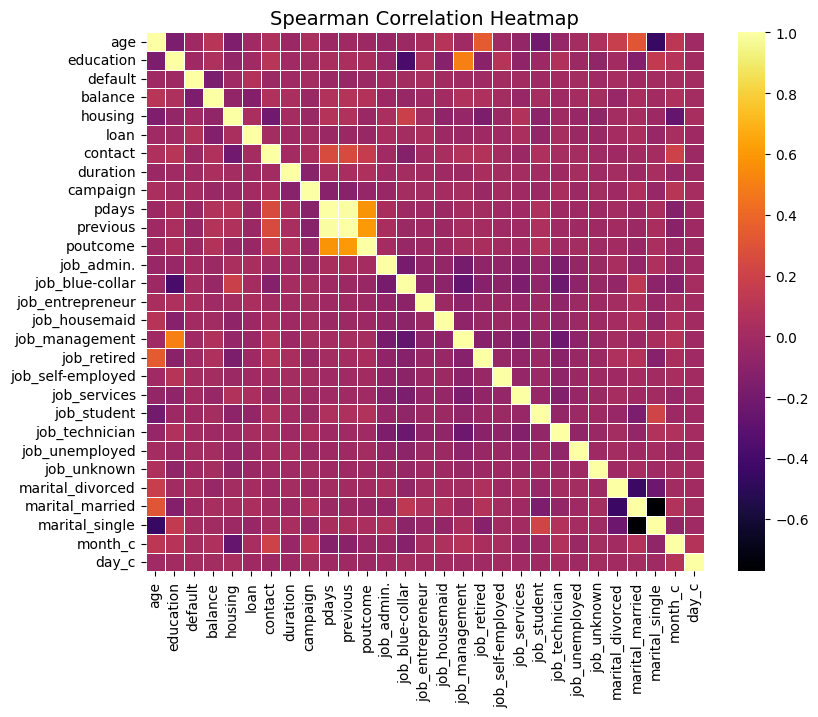

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

heatmap = sns.heatmap(train.corr(method="spearman"), cmap='inferno', linewidths=0.5, annot_kws={"size": 10})
#sns.heatmap(train.corr(method="spearman"), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

plt.title("Spearman Correlation Heatmap", fontsize=14)

plt.show()

In [ ]:
corr_matrix = df.corr(method='spearman')

highly_correlated = corr_matrix[corr_matrix > 0.9].stack().sort_values(ascending=False)

highly_correlated = highly_correlated[highly_correlated < 1.0].reset_index()
highly_correlated.columns = ['Column 1', 'Column 2', 'Correlation']

print(highly_correlated)

   Column 1  Column 2  Correlation
0     pdays  previous     0.985645
1  previous     pdays     0.985645


<ipython-input-87-4ecf7656e22e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


In [ ]:
train = train.drop(['pdays'], axis = 1)

In [ ]:
def deleting_correlated(df):
  df = df.drop(['pdays'], axis = 1)
  return df

In [ ]:
from sklearn.preprocessing import StandardScaler
def standardization(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    standardized_df = pd.DataFrame(scaled_data, columns=data.columns)
    return standardized_df


In [ ]:
train = standardization(train)
train.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,previous,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,month_c,day_c
0,-0.930461,-0.070175,-0.134703,-0.689176,0.891950,-0.436973,0.406667,-0.823800,-0.792158,-0.427373,...,3.161069,-0.147851,-0.448815,-0.172841,-0.080944,-0.360062,0.813232,-0.628736,0.355224,-1.026696
1,-0.553871,-0.070175,-0.134703,-0.567864,0.891950,-0.436973,0.406667,-0.200727,-0.792158,-0.427373,...,3.161069,-0.147851,-0.448815,-0.172841,-0.080944,-0.360062,0.813232,-0.628736,-0.890724,-0.543546
2,-1.589493,-0.070175,-0.134703,-0.641652,0.891950,-0.436973,-1.413671,-0.030798,-0.267177,-0.427373,...,-0.316349,-0.147851,-0.448815,-0.172841,-0.080944,-0.360062,-1.229661,1.590493,-0.475408,-1.026696
3,-0.553871,-0.070175,-0.134703,-0.639776,0.891950,2.288469,-1.413671,1.735435,-0.267177,-0.427373,...,-0.316349,-0.147851,-0.448815,-0.172841,-0.080944,-0.360062,0.813232,-0.628736,-0.060092,-1.026696
4,-0.365576,-0.070175,-0.134703,-0.624143,-1.121139,2.288469,0.406667,-0.231623,-0.267177,2.991503,...,3.161069,-0.147851,-0.448815,-0.172841,-0.080944,-0.360062,-1.229661,1.590493,2.016487,1.389055


Koniec preprocessingu

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

steps = [
    ('encoding', FunctionTransformer(encoding)),
    ('outliers', FunctionTransformer(winsorize_columns)),
    ('correlation', FunctionTransformer(deleting_correlated)),
    ('standardization', FunctionTransformer(standardization))
]

pipeline = Pipeline(steps)

Klatysteryzacja

K_means - szukanie najlepszej liczby klastrów metodą elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

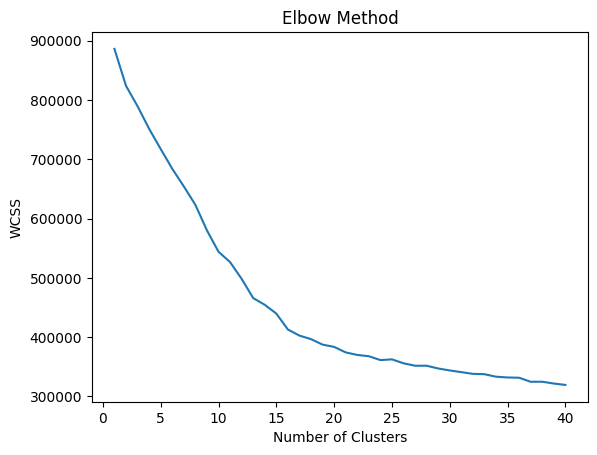

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow(X, max_clusters):
    wcss = []  

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  

    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

max_clusters = 40
plot_elbow(train, max_clusters)


In [ ]:
k = 19
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(train)

labels = kmeans.labels_

centers = kmeans.cluster_centers_

print(labels[:30])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 5  5 17  7  5  7 18 10 18  1 17  0  0  2  5  7  2  5  5  7 17  9 17  7
 16  5  4  3  0  2]


In [ ]:
from sklearn.metrics import pairwise_distances


def get_sse(df, labels, centroids):
  distances = pairwise_distances(df, centroids)
  squared_errors = np.zeros(df.shape[0])

  for i, label in enumerate(labels):
        centroid = centroids[label]
        distance = distances[i, label]
        squared_error = distance ** 2
        squared_errors[i] = squared_error

  sse = np.sum(squared_errors)
  return sse

In [ ]:
get_sse(train, labels, centers)

387455.5152808974

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

In [ ]:
score = calculate_silhouette_score(train, labels)
print(score)

0.20505844456347141


In [ ]:
train.shape

(31647, 28)

Wizualizacja po PCA




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


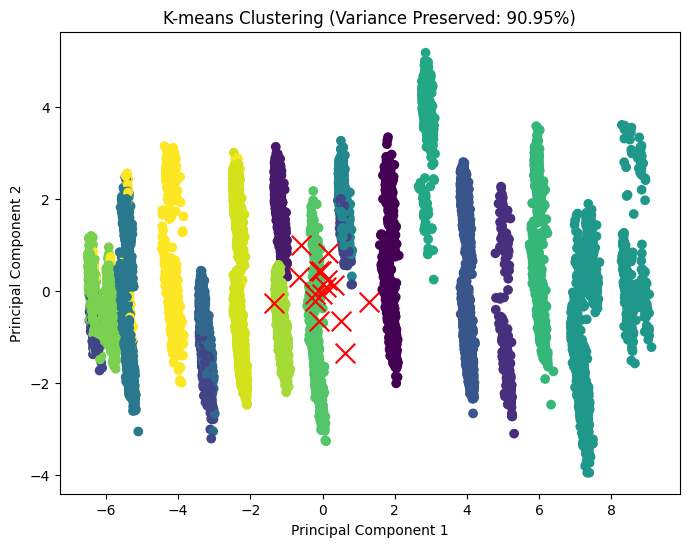

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9) 

pca_data = pca.fit_transform(train)

explained_variance_ratio = pca.explained_variance_ratio_
variance_preserved = np.sum(explained_variance_ratio) * 100

k = 16
kmeans = KMeans(n_clusters=k)
kmeans.fit(train)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('K-means Clustering (Variance Preserved: {:.2f}%)'.format(variance_preserved))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
score = calculate_silhouette_score(train, labels)
print(score)

0.19954140017403119


In [ ]:
get_sse(train, labels, centers)

412756.1586924518

DBSCAN

In [ ]:
def calculate_cluster_representatives(data, labels):
    cluster_representatives = []
    unique_labels = set(labels)

    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = data[labels == label]
        representative_point = np.mean(cluster_points, axis=0)
        cluster_representatives.append(representative_point)

    return cluster_representatives

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_silhouette_score = -1
best_labels = None
best_sse = np.inf

for eps in [2, 2.5, 3]:
    for min_samples in [50, 100, 200]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(train)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            silhouette_avg = silhouette_score(train, labels)
            cluster_representatives = calculate_cluster_representatives(train, labels)
            sse = get_sse(train, labels, cluster_representatives)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_labels = labels
                best_sse = sse

print("Best Silhouette Score:", best_silhouette_score)
print("Best SSE:", best_sse)

Best Silhouette Score: 0.14292679745071574
Best SSE: 1122925.8936534086


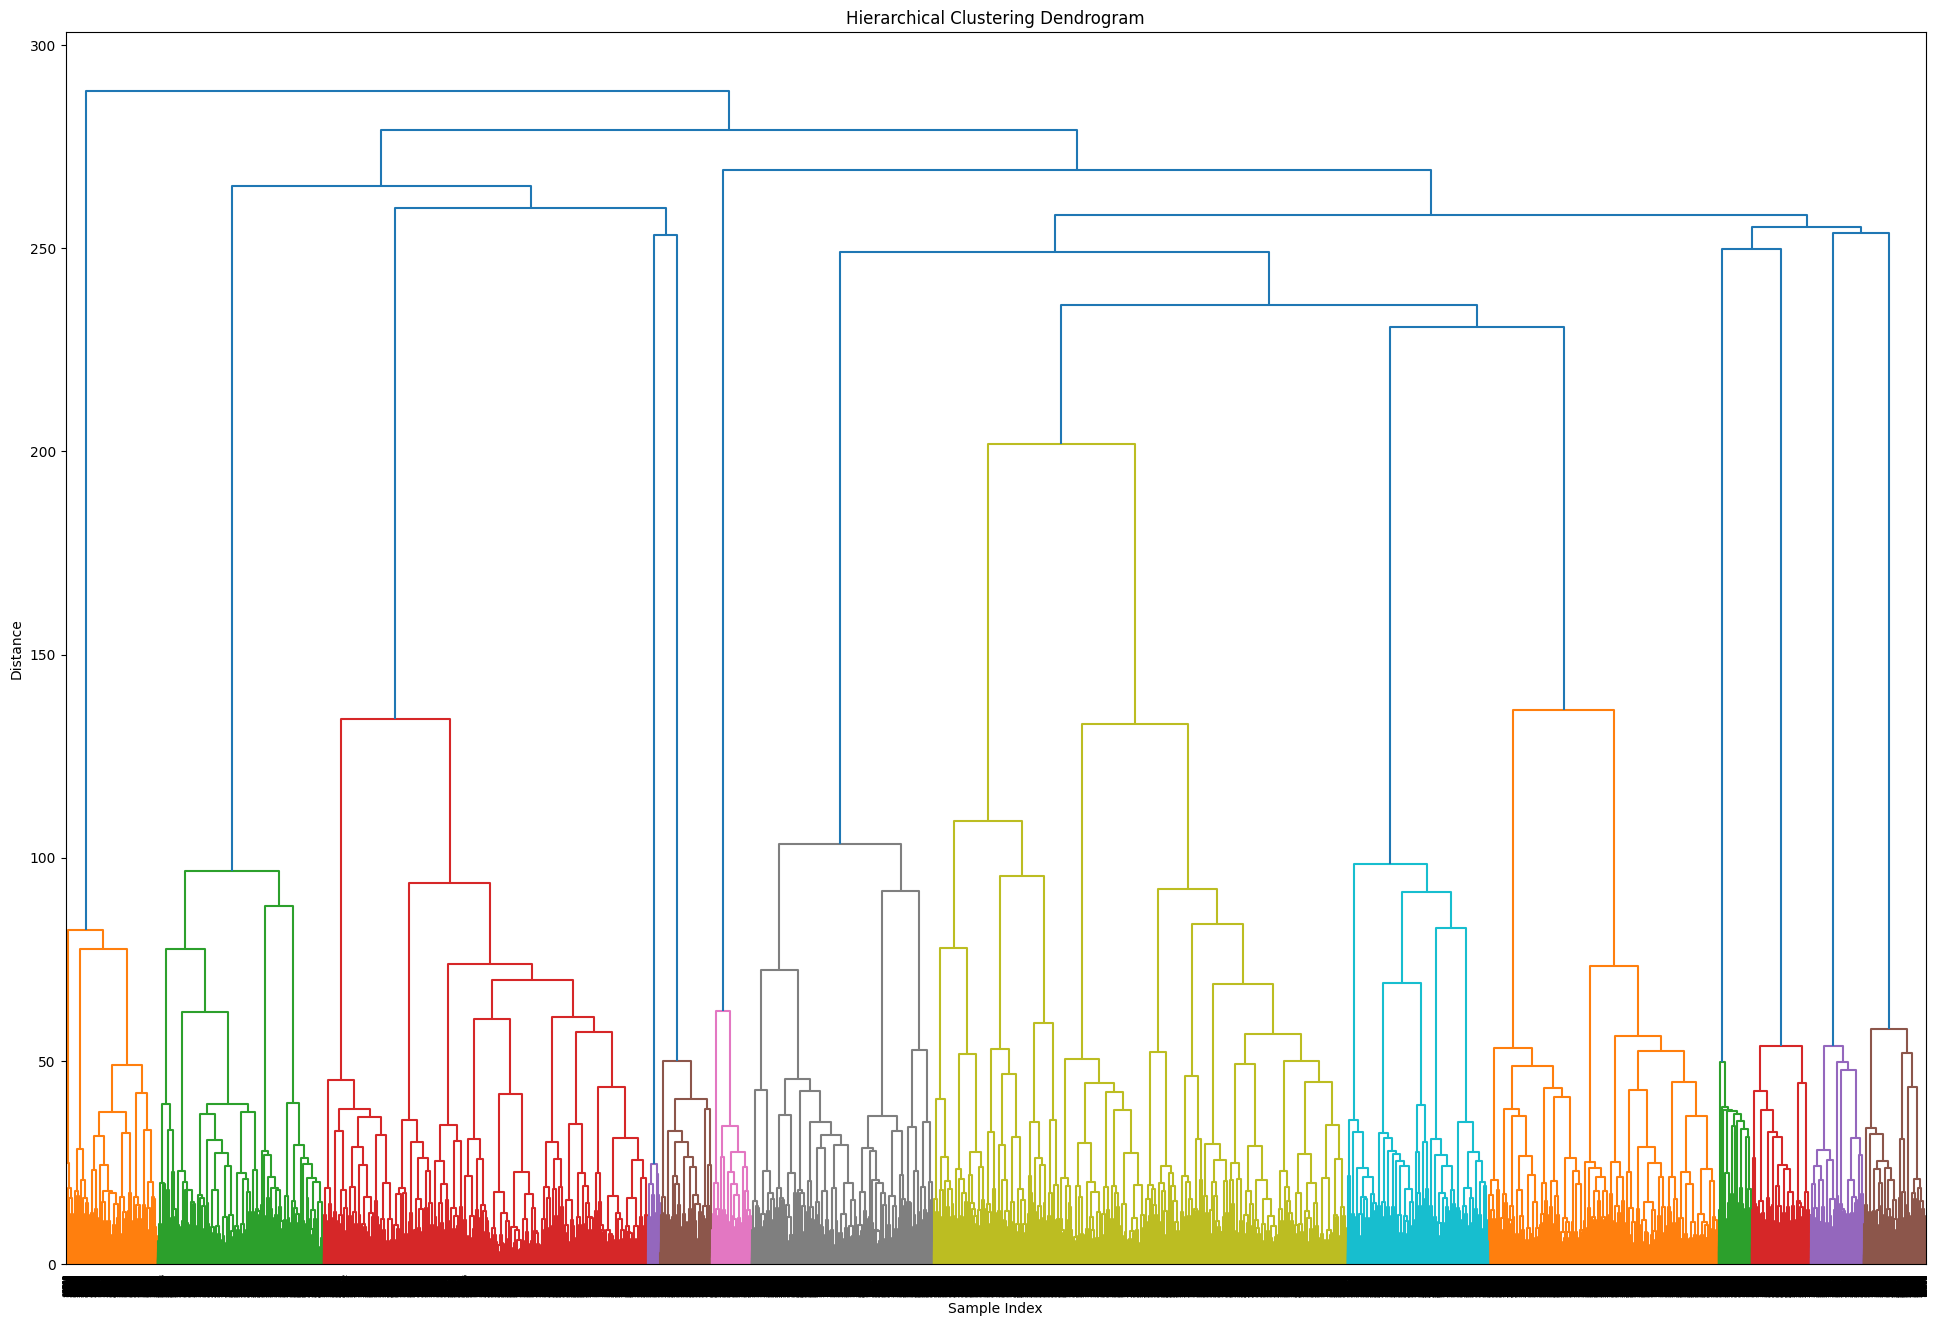

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(train.values, method='ward', metric='euclidean')

plt.figure(figsize=(24, 16))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq

linkage_matrix = linkage(train.values, method='ward', metric='euclidean')

threshold = 50
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

centroids, distortion = kmeans(train.values, num_clusters)
cluster_indices, _ = vq(train.values, centroids)
sse = np.sum((train.values - centroids[cluster_indices]) ** 2)
print("Sum of Squared Errors (SSE):", sse)


Number of clusters: 60
Silhouette Score: 0.15105063238693836
Sum of Squared Errors (SSE): 290872.8656515947


In [ ]:
threshold = 25
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

centroids, distortion = kmeans(train.values, num_clusters)
cluster_indices, _ = vq(train.values, centroids)
sse = np.sum((train.values - centroids[cluster_indices]) ** 2)
print("Sum of Squared Errors (SSE):", sse)

Number of clusters: 203
Silhouette Score: 0.12220898606334575
Sum of Squared Errors (SSE): 206535.66151310707


In [ ]:
threshold = 100
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

centroids, distortion = kmeans(train.values, num_clusters)
cluster_indices, _ = vq(train.values, centroids)
sse = np.sum((train.values - centroids[cluster_indices]) ** 2)
print("Sum of Squared Errors (SSE):", sse)

Number of clusters: 20
Silhouette Score: 0.18399089016060072
Sum of Squared Errors (SSE): 410889.35543217405


In [ ]:
threshold = 150
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

centroids, distortion = kmeans(train.values, num_clusters)
cluster_indices, _ = vq(train.values, centroids)
sse = np.sum((train.values - centroids[cluster_indices]) ** 2)
print("Sum of Squared Errors (SSE):", sse)

Number of clusters: 15
Silhouette Score: 0.20982600209012725
Sum of Squared Errors (SSE): 465746.53986482666


In [ ]:
threshold = 250
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

centroids, distortion = kmeans(train.values, num_clusters)
cluster_indices, _ = vq(train.values, centroids)
sse = np.sum((train.values - centroids[cluster_indices]) ** 2)
print("Sum of Squared Errors (SSE):", sse)

Number of clusters: 10
Silhouette Score: 0.1351932852901414
Sum of Squared Errors (SSE): 563932.5589097114


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

num_clusters = 16
gmm = GaussianMixture(n_components=num_clusters, random_state=42)

gmm.fit(train)

clusters = gmm.predict(train)

silhouette_avg = silhouette_score(train, clusters)
print("Silhouette Score:", silhouette_avg)

train['Cluster'] = clusters


Silhouette Score: 0.1950053406061051
